In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.utils.validation import column_or_1d

In [2]:
# Data visualisation and preparation
geno = pd.read_csv("../Ressources/geno.csv")
pheno = pd.read_csv("../Ressources/pheno.csv")
Y = pheno[["Seed.number.per.panicle"]]
Y = Y.fillna(Y.mean())
print(Y)

# We only keep the quantitative variables
X = geno.iloc[:, 4:]
X = X.fillna(X.mean())
X.head()
X = X.transpose()
X.shape

     Seed.number.per.panicle
0                   4.785975
1                   4.439706
2                   5.079709
3                   4.523960
4                   5.538646
..                       ...
408                 4.985887
409                 4.354375
410                 4.620507
411                 5.324838
412                 4.932510

[413 rows x 1 columns]


(413, 36901)

In [3]:
print(X.info())
print(X.iloc[0:10,0:10].describe())
print(X)

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 1 to 413
Columns: 36901 entries, 0 to 36900
dtypes: float64(36901)
memory usage: 116.3+ MB
None
               0          1          2          3          4          5  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.800000   0.800000   0.200000   0.600000   0.800000   0.516870   
std     1.032796   1.032796   0.632456   0.966092   1.032796   0.862446   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     2.000000   2.000000   0.000000   1.500000   2.000000   0.876526   
max     2.000000   2.000000   2.000000   2.000000   2.000000   2.000000   

               6          7          8          9  
count  10.000000  10.000000  10.000000  10.000000  
mean    0.200000   0.800000   0.800000   0.600000  
std     0.6324

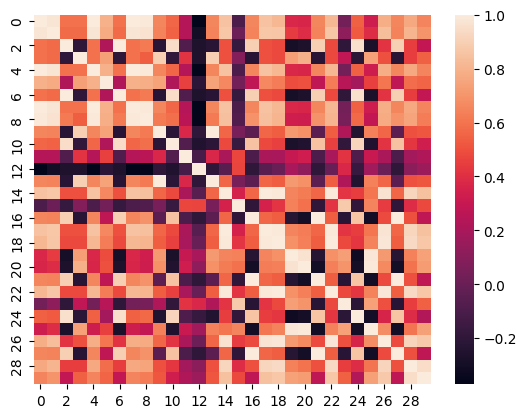

In [4]:
# We split our data into train (60%), test (20%) and validation (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1)


# Exemple de matrice de corrélation (avec heatmap)
corr_matrix = X_train.iloc[0:30,0:30].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [5]:
# Linear regression
linear_model = LinearRegression().fit(X_train, Y_train)
print(linear_model.coef_, linear_model.intercept_, linear_model.score(X_train, Y_train))

Y_predict = linear_model.predict(X_test)
#print(Y_predict)
print(r2_score(Y_test,Y_predict))

[[ 2.55992079e-04 -3.47946998e-04  5.03559978e-05 ...  5.32752005e-05
   8.16496465e-05  8.69404386e-05]] [4.78597544] 1.0
0.29200527535097753


<AxesSubplot:xlabel='Seed.number.per.panicle'>

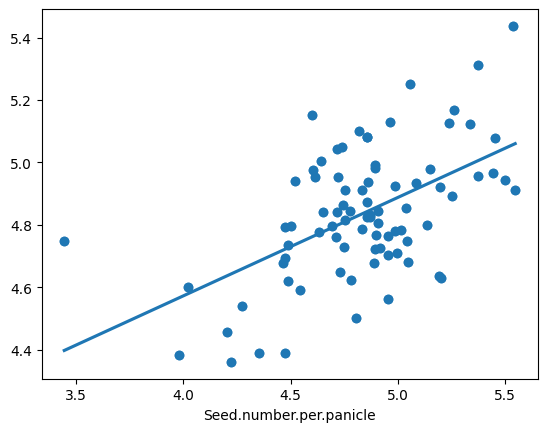

In [6]:
# Plot with basic linear regression
plt.scatter(Y_test, Y_predict)
sns.regplot(x=Y_test, y=Y_predict,ci=None)

In [6]:
# Lasso regression
lasso_model = Lasso().fit(X_train,Y_train)
print(lasso_model.coef_, lasso_model.intercept_)

[-0. -0. -0. ...  0.  0.  0.] [4.86244366]


0.0


<AxesSubplot:xlabel='Seed.number.per.panicle'>

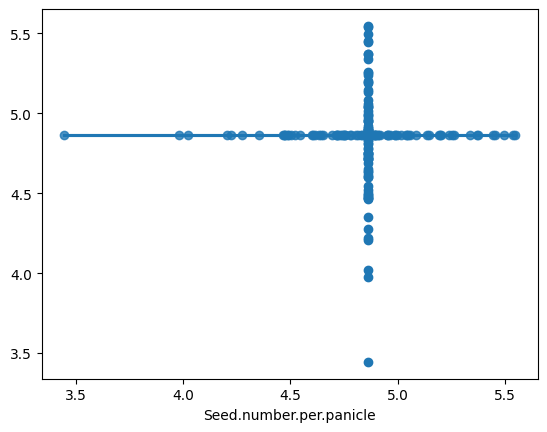

In [7]:
Y_lasso_pred = lasso_model.predict(X_test)
print(r2_score(Y_lasso_pred, Y_test))
plt.scatter(Y_lasso_pred, Y_test)
sns.regplot(x=Y_test, y=Y_lasso_pred,ci=None)

In [ ]:
reglassocv = LassoCV(cv = 10).fit(X_train, Y_train)
Y_test = column_or_1d(y, warn=True)
print(reglassocv.score(X_test, Y_test))
